### 로지스틱 회귀 (Logistic Regression) --> 분류모델
데이터가 어떤 범주에 속할 확률을 0~1 사이의 값으로 예측<br>
더 높은 범주에 속하는 쪽으로 분류
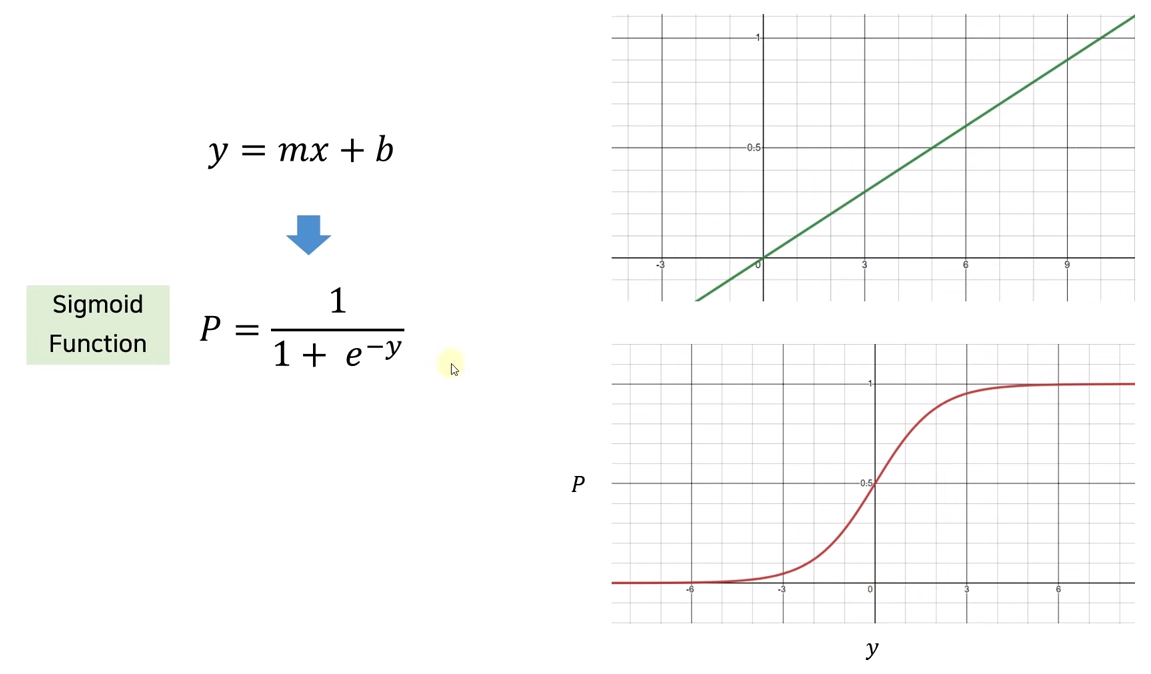

### 공부시간에 따른 자격증 시험 합격 가능성

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv('LogisticRegressionData.csv')
#독립변수
X = dataset.iloc[:,:-1].values # row는 전부, column은 마지막꺼 하나빼고 다
#종속변수
y = dataset.iloc[:,-1].values # row는 전부, column은 마지막꺼 하나만


#### 데이터 분리

In [3]:
from sklearn.model_selection import train_test_split
# 4개 값 출력
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
#testset를 20퍼센트, random_state -> seed 

### 학습 (로지스틱 회귀 모델)

In [4]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

### 6시간 공부했을 때 예측?

In [5]:
classifier.predict([[6]])
# 결과 1 : 합격할 것으로 예측

array([1], dtype=int64)

In [7]:
classifier.predict_proba([[6]]) # 합격할 확률 출력
# 불합격 확률 14%, 합격할 확률 86%

array([[0.14150735, 0.85849265]])

### 4시간 공부했을 때 예측?

In [6]:
classifier.predict([[4]])
# 결과 0 : 불합격할 것으로 예측

array([0], dtype=int64)

In [8]:
classifier.predict_proba([[4]]) # 합격할 확률 출력
# 불합격 확률 62%, 합격할 확률 38%

array([[0.6249966, 0.3750034]])

### 분류 결과 예측 (test set)

In [10]:
y_pred = classifier.predict(X_test)
y_pred # 예측값

array([1, 0, 1, 1], dtype=int64)

In [11]:
y_test # 실제값

array([1, 0, 1, 0], dtype=int64)

In [12]:
X_test #공부시간

array([[ 8.6],
       [ 1.2],
       [10. ],
       [ 4.5]])

In [13]:
classifier.score(X_test, y_test) # 모델 평가
# 전체 테스트 세트 4개 중에서 분류 예측을 올바로 맞힌 개수 3개

0.75

### 데이터 시각화(훈련 세트)

In [18]:
X_range = (np.arange(min(X),max(X),0.1)).reshape(-1,1)

In [19]:
X_range.shape

(95, 1)

In [20]:
m = classifier.coef_
b = classifier.intercept_

In [21]:
y = m * X_range + b

In [22]:
p = 1 / (1 + np.exp(-y))

In [23]:
p.shape

(95, 1)

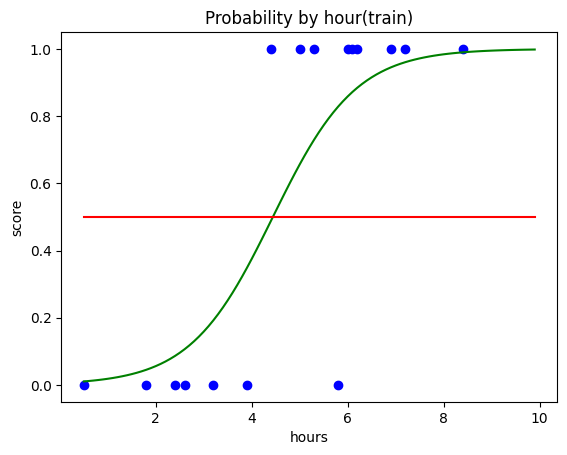

In [27]:
plt.scatter(X_train,y_train,color = "blue") #산점도
plt.plot(X_range, p, color = 'green') #선 그래프
plt.plot(X_range, np.full(len(X_range), 0.5), color = 'red') #X_range 개수 만큼 0.5로 가득찬 배열 만들기
plt.title("Probability by hour(train)") # 제목
plt.xlabel('hours')# X축 이름
plt.ylabel('score')# y축 이름
plt.show()

### 데이터 시각화(테스트 세트)

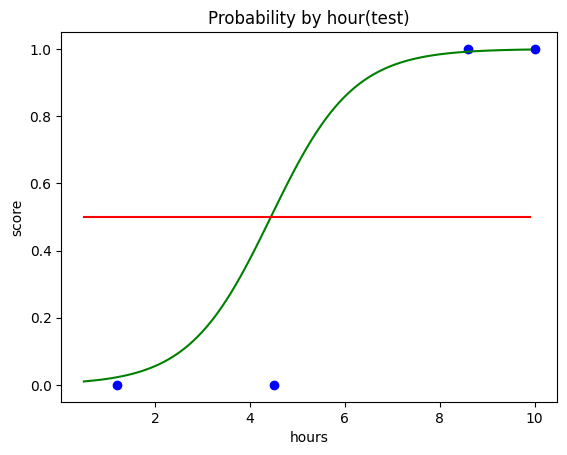

In [26]:
plt.scatter(X_test,y_test,color = "blue") #산점도
plt.plot(X_range, p, color = 'green') #선 그래프
plt.plot(X_range, np.full(len(X_range), 0.5), color = 'red') #X_range 개수 만큼 0.5로 가득찬 배열 만들기
plt.title("Probability by hour(test)") # 제목
plt.xlabel('hours')# X축 이름
plt.ylabel('score')# y축 이름
plt.show()

In [28]:
classifier.predict_proba([[4.5]]) #4.5 시간 공부했을 때 확률
# 모델에서는 51%확률로 합격 예측, 실제로는 불합격

array([[0.48310686, 0.51689314]])

### 혼동 행렬 (confusion Matrix)

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

# 불합격(예측) -> 불합격(실제) || 합격(예측) -> 불합격 (실제)
# True Negative (TN)         || Flase Positive (FP) 
# ########################################################
# 불합격 (예측) -> 합격(실제)  || 합격(예측) -> 합격 (실제)
# Flase Negative (FN)        || True Positive (TP)

array([[1, 1],
       [0, 2]], dtype=int64)